In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [6]:
noise

array([ 1.15175882, -0.65635912,  0.13590918, ...,  0.44726452,
        0.02670542,  0.90394216])

y = mx + b

b=5

In [7]:
y_true = (0.5 * x_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [9]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [10]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [11]:
y_df.head()

,Y
0,6.151759
1,4.343646
2,5.135919
3,4.585238
4,5.508889


In [12]:
my_data = pd.concat([x_df, y_df], axis=1)

In [13]:
my_data.head()

,X Data,Y
0,0.00000,6.151759
1,0.00001,4.343646
2,0.00002,5.135919
3,0.00003,4.585238
4,0.00004,5.508889


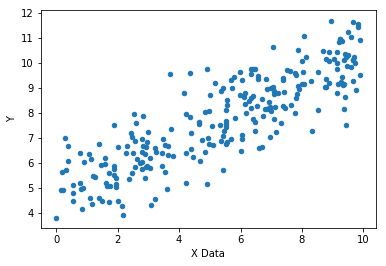

In [15]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [16]:
batch_size = 8

In [17]:
np.random.randn(2)

array([ 0.83347883,  1.30872898])

In [18]:
m = tf.Variable(0.83)
b = tf.Variable(1.3)

In [19]:
xph = tf.placeholder(tf.float32, shape=[batch_size])

In [20]:
yph = tf.placeholder(tf.float32, shape=[batch_size])

In [21]:
y_model = m * xph + b

In [22]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [24]:
train = optimizer.minimize(error)

In [25]:
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

In [38]:
model_m

0.52746296

In [39]:
model_b

5.0009212

In [40]:
y_hat = x_data*model_m + model_b

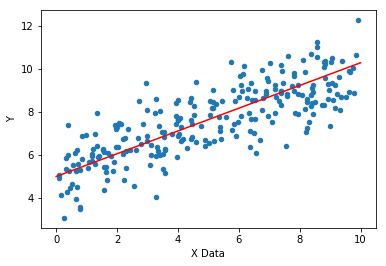

In [41]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')